<a href="https://colab.research.google.com/github/Amarjeet-1998/stock-market-price/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 44.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [32]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [5]:
df = yf.download("AAPL", start="2010-01-30", end="2019-12-31")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-02-01,6.870357,7.000000,6.832143,6.954643,5.946344,749876400
2010-02-02,6.996786,7.011429,6.906429,6.995000,5.980850,698342400
2010-02-03,6.970357,7.150000,6.943571,7.115357,6.083758,615328000
2010-02-04,7.026071,7.084643,6.841786,6.858929,5.864507,757652000
2010-02-05,6.879643,7.000000,6.816071,6.980714,5.968636,850306800


In [6]:
df.tail

<bound method NDFrame.tail of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-02-01   6.870357   7.000000   6.832143   6.954643   5.946344  749876400
2010-02-02   6.996786   7.011429   6.906429   6.995000   5.980850  698342400
2010-02-03   6.970357   7.150000   6.943571   7.115357   6.083758  615328000
2010-02-04   7.026071   7.084643   6.841786   6.858929   5.864507  757652000
2010-02-05   6.879643   7.000000   6.816071   6.980714   5.968636  850306800
...               ...        ...        ...        ...        ...        ...
2019-12-23  70.132500  71.062500  70.092499  71.000000  69.769272   98572000
2019-12-24  71.172501  71.222504  70.730003  71.067497  69.835602   48478800
2019-12-26  71.205002  72.495003  71.175003  72.477501  71.221153   93121200
2019-12-27  72.779999  73.492500  72.029999  72.449997  71.194138  146266000
2019-12-30  72.364998  73.172501  71.305000  7

In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-01,6.870357,7.000000,6.832143,6.954643,5.946344,749876400
1,2010-02-02,6.996786,7.011429,6.906429,6.995000,5.980850,698342400
2,2010-02-03,6.970357,7.150000,6.943571,7.115357,6.083758,615328000
3,2010-02-04,7.026071,7.084643,6.841786,6.858929,5.864507,757652000
4,2010-02-05,6.879643,7.000000,6.816071,6.980714,5.968636,850306800


In [8]:
df = df.drop(['Date','Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,6.870357,7.000000,6.832143,6.954643,749876400
1,6.996786,7.011429,6.906429,6.995000,698342400
2,6.970357,7.150000,6.943571,7.115357,615328000
3,7.026071,7.084643,6.841786,6.858929,757652000
4,6.879643,7.000000,6.816071,6.980714,850306800


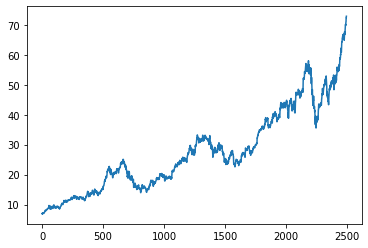

In [10]:
plt.plot(df.Close)

In [11]:
df

,Open,High,Low,Close,Volume
0,6.870357,7.000000,6.832143,6.954643,749876400
1,6.996786,7.011429,6.906429,6.995000,698342400
2,6.970357,7.150000,6.943571,7.115357,615328000
3,7.026071,7.084643,6.841786,6.858929,757652000
4,6.879643,7.000000,6.816071,6.980714,850306800
...,...,...,...,...,...
2491,70.132500,71.062500,70.092499,71.000000,98572000
2492,71.172501,71.222504,70.730003,71.067497,48478800
2493,71.205002,72.495003,71.175003,72.477501,93121200
2494,72.779999,73.492500,72.029999,72.449997,146266000


In [12]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2491    59.201075
2492    59.401700
2493    59.643125
2494    59.875125
2495    60.106325
Name: Close, Length: 2496, dtype: float64

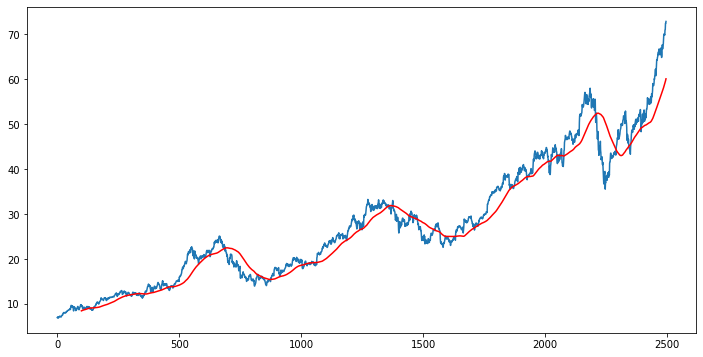

In [15]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [16]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2491    54.132313
2492    54.261513
2493    54.396763
2494    54.529350
2495    54.661100
Name: Close, Length: 2496, dtype: float64

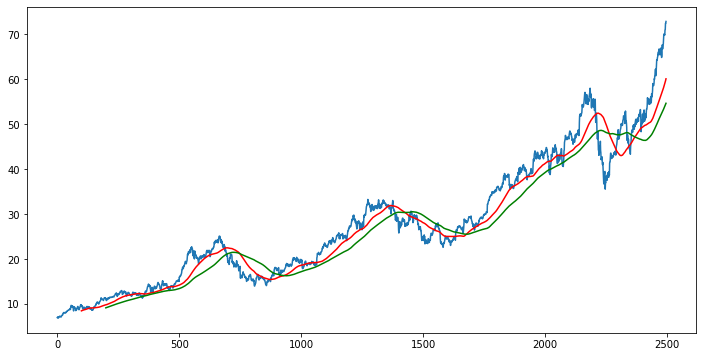

In [17]:
plt.figure(figsize= (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
df.shape

(2496, 5)

In [19]:
# splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1747, 1)
(749, 1)


In [20]:
data_training.head()

,Close
0,6.954643
1,6.995000
2,7.115357
3,6.858929
4,6.980714


In [21]:
data_testing.head()

,Close
1747,29.747499
1748,29.777500
1749,29.937500
1750,29.812500
1751,29.760000


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [24]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00362674],
       [0.00515594],
       [0.00971646],
       ...,
       [0.83915011],
       [0.84473916],
       [0.85705396]])

In [25]:
data_training_array.shape

(1747, 1)

In [26]:
x_train = []
y_train = []


for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [36]:
#ML model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [38]:
model= Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences =True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences =True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80,activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_3 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 120)              

In [40]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs =50)

Epoch 1/50
52/52 [==============================] - 30s 280ms/step - loss: 0.0647
Epoch 2/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0125
Epoch 3/50
52/52 [==============================] - 15s 280ms/step - loss: 0.0104
Epoch 4/50
52/52 [==============================] - 21s 402ms/step - loss: 0.0091
Epoch 5/50
52/52 [==============================] - 18s 353ms/step - loss: 0.0100
Epoch 6/50
52/52 [==============================] - 13s 257ms/step - loss: 0.0088
Epoch 7/50
52/52 [==============================] - 14s 263ms/step - loss: 0.0083
Epoch 8/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0077
Epoch 10/50
52/52 [==============================] - 14s 272ms/step - loss: 0.0085
Epoch 11/50
52/52 [==============================] - 13s 253ms/step - loss: 0.0071
Epoch 12/50
52/52 [==============================] - 14s 266ms/step - loss: 0.0075
Epoch 13/50
5

In [41]:
model.save('keras_model.h5')

In [42]:
data_testing.head()

,Close
1747,29.747499
1748,29.777500
1749,29.937500
1750,29.812500
1751,29.760000


In [43]:
data_training.tail(100)

,Close
1647,27.344999
1648,27.305000
1649,27.270000
1650,27.340000
1651,27.127501
...,...
1742,28.955000
1743,29.037500
1744,29.004999
1745,29.152500


In [44]:
past_100_days = data_training.tail(100)

In [45]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [46]:
final_df.head()

,Close
0,27.344999
1,27.305000
2,27.270000
3,27.340000
4,27.127501


In [47]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855781],
       [0.03036255],
       [0.02600988],
       [0.02356814],
       [0.02022403],
       [0.01958704],
       [0.01523437],
       [0.01576518],
       [0.01910933],
       [0.02441747],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226183],
       [0.02558522],
       [0.04586231],
       [0.06603324],
       [0.06258295],
       [0.05547006],
       [0.05541697],
       [0.05531082],
       [0.06099053],
       [0.05085197],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803866],
       [0.05265676],
       [0.04984341],
       [0.05239133],
       [0.05265676],
       [0.05711557],
       [0.05801795],
       [0.06858117],
       [0.0699082 ],
       [0.07542863],
       [0.07351774],
       [0.076968  ],
       [0.07654338],
       [0.07611871],
       [0.07426087],
       [0.07394236],
       [0.071

In [48]:
input_data.shape

(849, 1)

In [49]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i,0])

In [50]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(749, 100, 1)
(749,)


In [51]:
# Making Prediction

y_predicted = model.predict(x_test)


In [53]:
y_predicted.shape

(749, 1)

In [54]:
y_test

array([0.08418707, 0.08482406, 0.08822126, 0.08556719, 0.08445249,
       0.0895483 , 0.0894952 , 0.0883805 , 0.0895483 , 0.08997296,
       0.08938906, 0.09952758, 0.0998461 , 0.09989915, 0.09820055,
       0.09671427, 0.1359945 , 0.1348267 , 0.1377462 , 0.144169  ,
       0.15075112, 0.15345824, 0.15547536, 0.1538829 , 0.16009341,
       0.16927655, 0.17187748, 0.17102824, 0.17299223, 0.17819418,
       0.18037053, 0.1772918 , 0.17798189, 0.17941503, 0.17973358,
       0.1945963 , 0.19019062, 0.19454325, 0.19220766, 0.19316316,
       0.19040291, 0.18870427, 0.19114605, 0.19146452, 0.19034986,
       0.19815283, 0.19937368, 0.195658  , 0.20346096, 0.19486173,
       0.20324859, 0.20059453, 0.19910825, 0.20038224, 0.21588199,
       0.21758055, 0.21657199, 0.21513885, 0.21535114, 0.22103089,
       0.21704978, 0.21513885, 0.21344021, 0.21253783, 0.20436334,
       0.20526571, 0.20128461, 0.20542495, 0.2020808 , 0.19932054,
       0.20866292, 0.20776054, 0.21503267, 0.21975691, 0.21524

In [55]:
y_predicted

array([[0.19284692],
       [0.19320111],
       [0.1935314 ],
       [0.19384566],
       [0.19414909],
       [0.19444415],
       [0.1947342 ],
       [0.19502164],
       [0.19530699],
       [0.19559006],
       [0.19587016],
       [0.19614582],
       [0.19642267],
       [0.1967077 ],
       [0.1970065 ],
       [0.19732055],
       [0.1976476 ],
       [0.19802916],
       [0.19851032],
       [0.19912998],
       [0.19992113],
       [0.20091021],
       [0.20207605],
       [0.2034159 ],
       [0.20492698],
       [0.20659906],
       [0.20842242],
       [0.21038443],
       [0.21246494],
       [0.21464007],
       [0.21688724],
       [0.21918431],
       [0.22150454],
       [0.22381978],
       [0.22610307],
       [0.22832927],
       [0.23048948],
       [0.23257592],
       [0.23458523],
       [0.23651238],
       [0.238352  ],
       [0.24009573],
       [0.24173284],
       [0.24325551],
       [0.24465856],
       [0.24593784],
       [0.24709907],
       [0.248

In [56]:
scaler.scale_

array([0.02123255])

In [57]:
scale_factor = 1/0.02123255
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

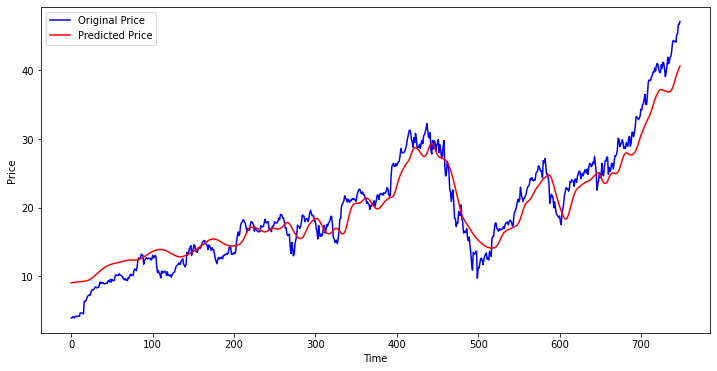

In [60]:
plt.figure(figsize =(12,6))
plt.plot(y_test,'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()